In [57]:
from util import get_corpus_text, vis_graph
from build_network import build_network

import networkx as nx

%matplotlib inline

In [ ]:
texts, _ = get_corpus_text('Three Months for Semantic Network Experiments', 'FOXNEWSW')

In [3]:
e = build_network(texts, alpha=0.75)

In [30]:
#tau = 0.6

#A = np.copy(e.edgeweight_mat)
#A[A <= tau] = 0.0
#A[A > tau] = 1.0
from semcable.util import _calculate_adjacency
A = _calculate_adjacency(e.edgeweight_mat, 20.16, 1e-3)
g = nx.from_numpy_matrix(A)

degs = np.flipud(np.sort(np.array(list(g.degree().values()))))
#g = nx.from_numpy_matrix(A)

degs = np.flipud(np.sort(np.array(list(g.degree().values()))))
#plt.hist(list(degs.values()), bins=20)

In [32]:
print(list(e.word_lookup.items())[:10])
print(list(e.index_lookup.items())[:10])
grel = nx.relabel_nodes(g, e.index_lookup)

[('smartphone', 4543), ('titles', 8160), ('explaining', 2022), ('original', 2772), ('opens', 2716), ('tough', 448), ('inherently', 8696), ('overlook', 12240), ('shale', 14575), ('appreciating', 8573)]
[(0, 'second'), (1, 'edition'), (2, 'kelly'), (3, 'pretty'), (4, 'fired'), (5, 'good'), (6, 'love'), (7, 'hear'), (8, 'see'), (9, 'welcome')]


(<matplotlib.figure.Figure at 0x113d5ae10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1134ce080>)

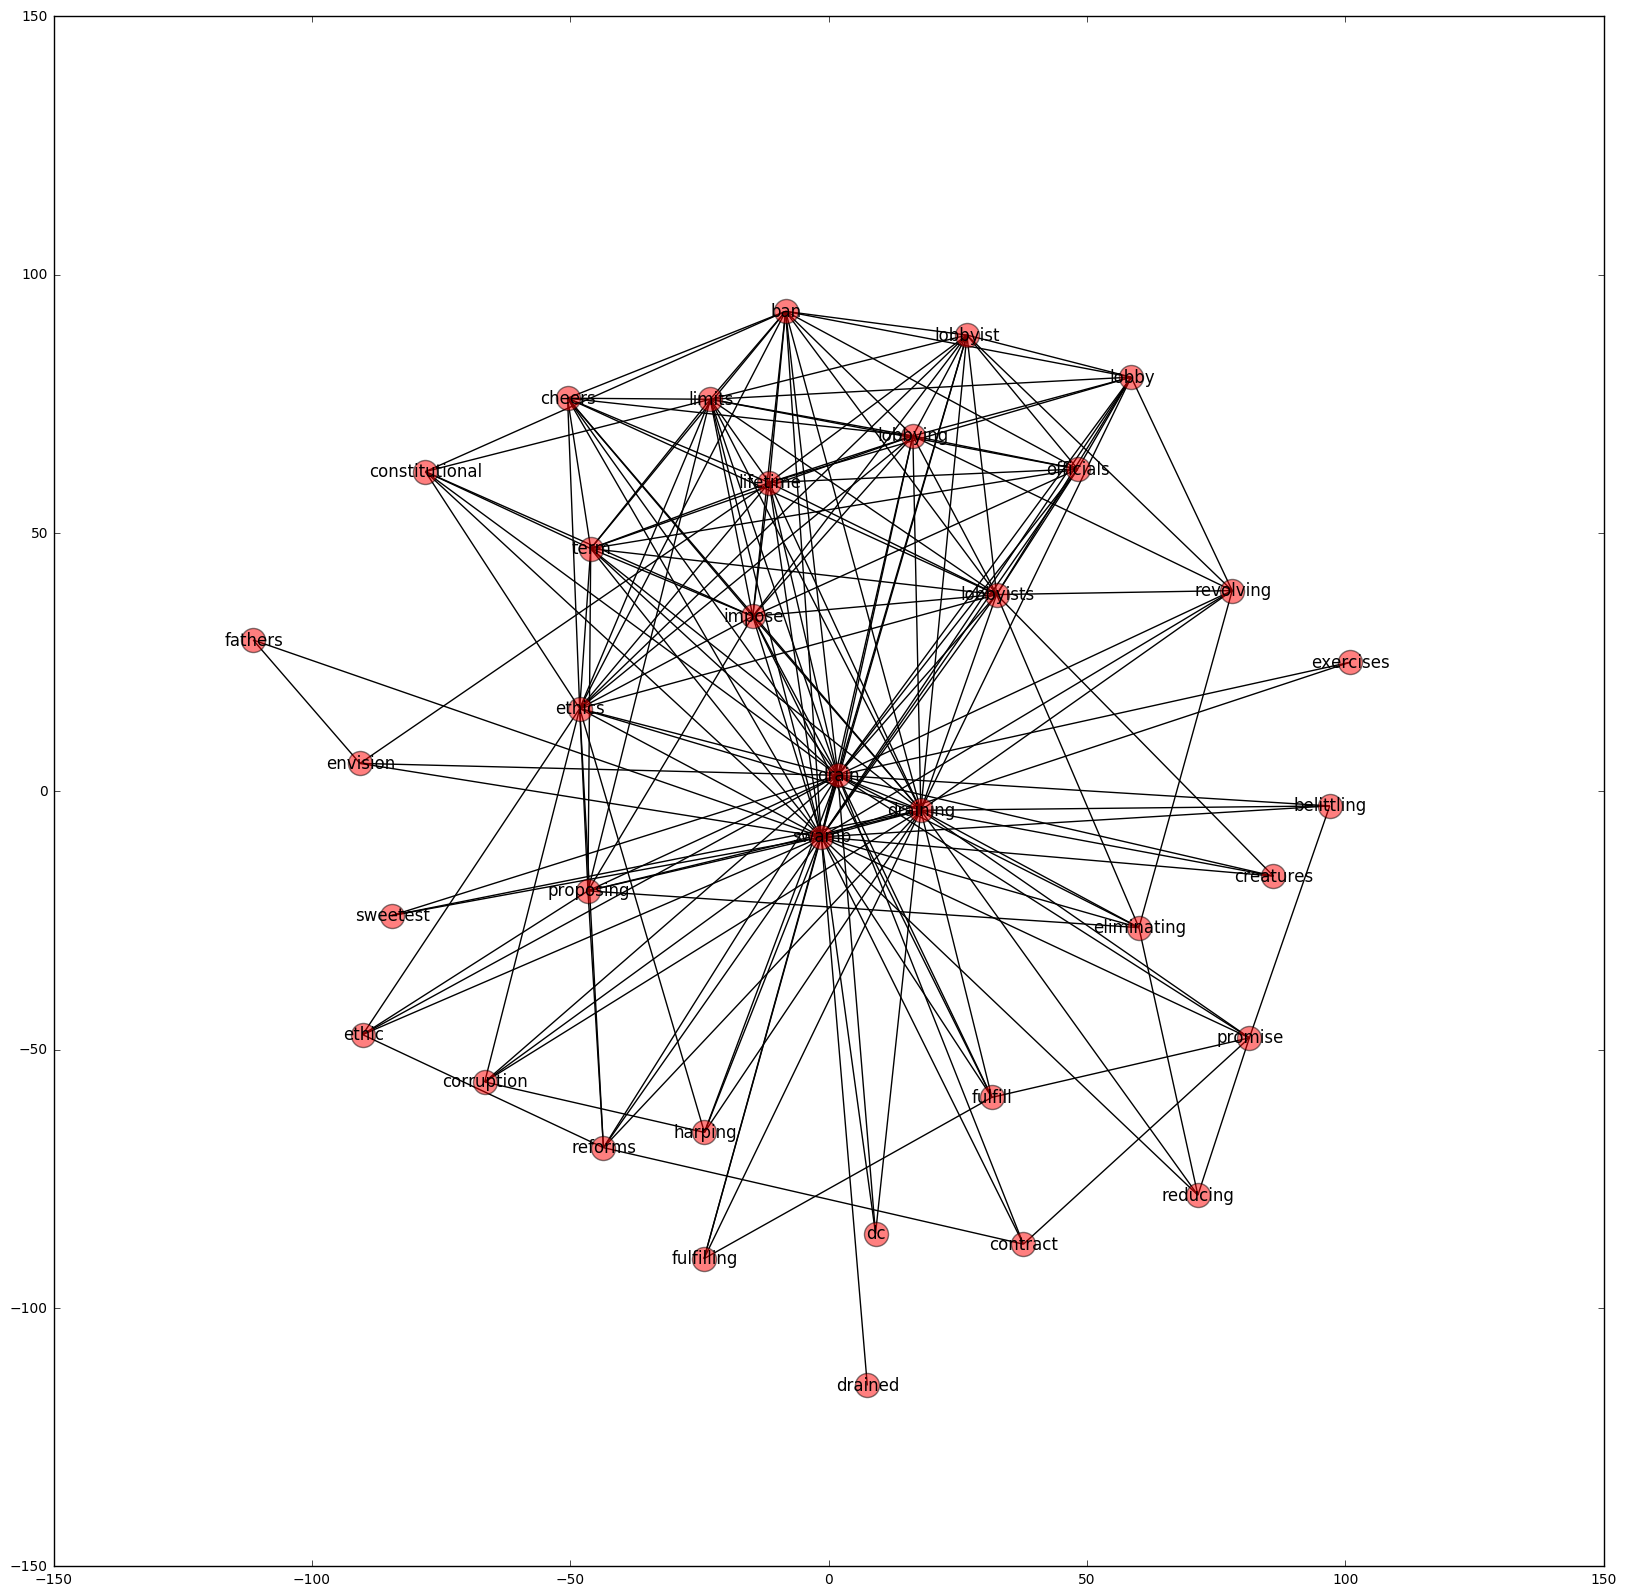

In [56]:
trump_neighbors = list(grel['swamp'].keys())
#trump_2degn = [el for n in trump_neighbors for el in list(grel[n])]
#print(trump_2degn)
vis_graph(grel.subgraph(['swamp'] + trump_neighbors), figsize=(20, 20))

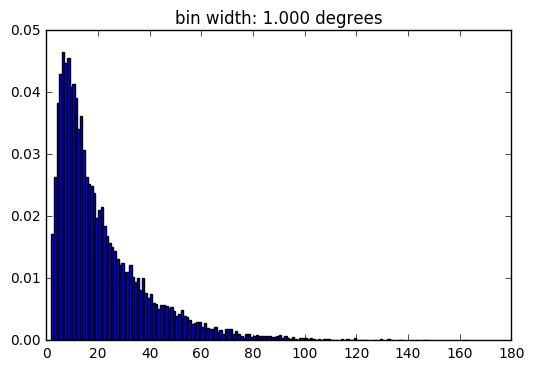

[-1.86455945  0.38108111]


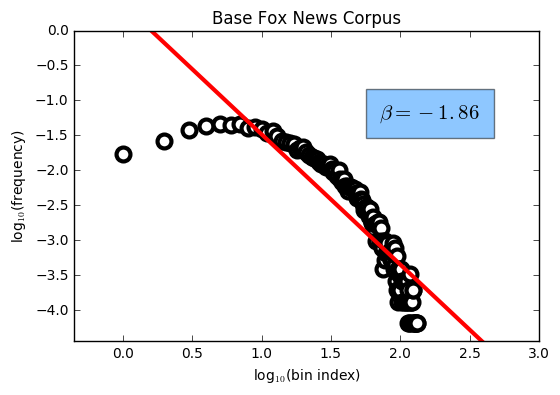

In [6]:
from numpy import histogram
from collections import Counter
  
c = list(Counter(degs).items())
b = np.array([a[0] for a in c])
v = np.array([a[1] for a in c], dtype=float)
v = v / v.sum()

bin_width = b[1] - b[0]

plt.bar(b, v, bin_width)
plt.title('bin width: %.3f degrees' % bin_width)
plt.show()

nbins = len(b)


logv = np.log10(v)
v_isfinite = np.isfinite(logv)
logv = logv[v_isfinite]

x = np.arange(len(v)) + 1
logx = np.log10(x)
logx = logx[v_isfinite]

coefficients = np.polyfit(logx, logv, 1)
print(coefficients)
polynomial = np.poly1d(coefficients)
ys = polynomial(np.arange(nbins))



plt.plot(logx, logv, marker='o', mew=3, color='white', lw=0, ms=10)
plt.plot(np.arange(nbins)[:4], ys[:4], color='red', lw=3)
plt.xlim([-0.35, 3])
plt.ylim([logv.min() - 0.25, 0])
plt.xlabel('log$_{10}$(bin index)')
plt.ylabel('log$_{10}$(frequency)')
plt.title('Base Fox News Corpus')
plt.text(1.85, -1.25, '$\\beta = %.2f$' % coefficients[0], fontsize=15, bbox={'facecolor':'#1E90FF', 'alpha':0.5, 'pad':10})
plt.show()

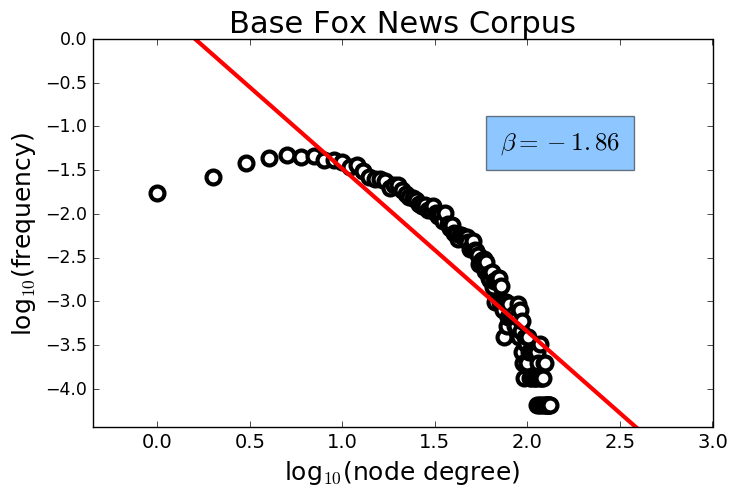

In [7]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
plt.plot(logx, logv, marker='o', mew=3, color='white', lw=0, ms=10)
plt.plot(np.arange(nbins)[:4], ys[:4], color='red', lw=3)
plt.xlim([-0.35, 3])
plt.ylim([logv.min() - 0.25, 0])
plt.xlabel('log$_{10}$(node degree)', size=18)
plt.ylabel('log$_{10}$(frequency)', size=18)
plt.title('Base Fox News Corpus', size=22)
plt.text(1.85, -1.25, '$\\beta = %.2f$' % coefficients[0], fontsize=18, 
         bbox={'facecolor':'#1E90FF', 'alpha':0.5, 'pad':10})
ax.tick_params(axis='x', which='major', labelsize=14)
ax.tick_params(axis='y', which='major', labelsize=12.5)
plt.show()

on word 0 out of 4
on word 1 out of 4
on word 2 out of 4
on word 3 out of 4


(<matplotlib.figure.Figure at 0x10c57a8d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10c57c3c8>)

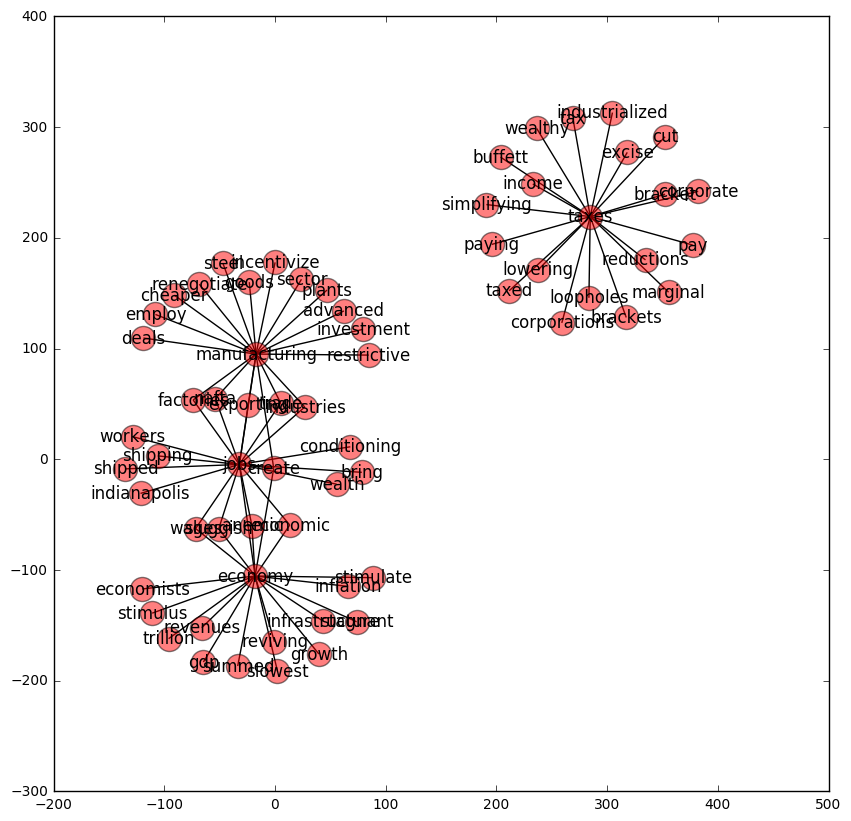

In [8]:
g = e.generate_graph(20, words=['jobs', 'manufacturing', 'taxes', 'economy'])
vis_graph(g, figsize=(10, 10))

on word 0 out of 4
on word 1 out of 4
on word 2 out of 4
on word 3 out of 4


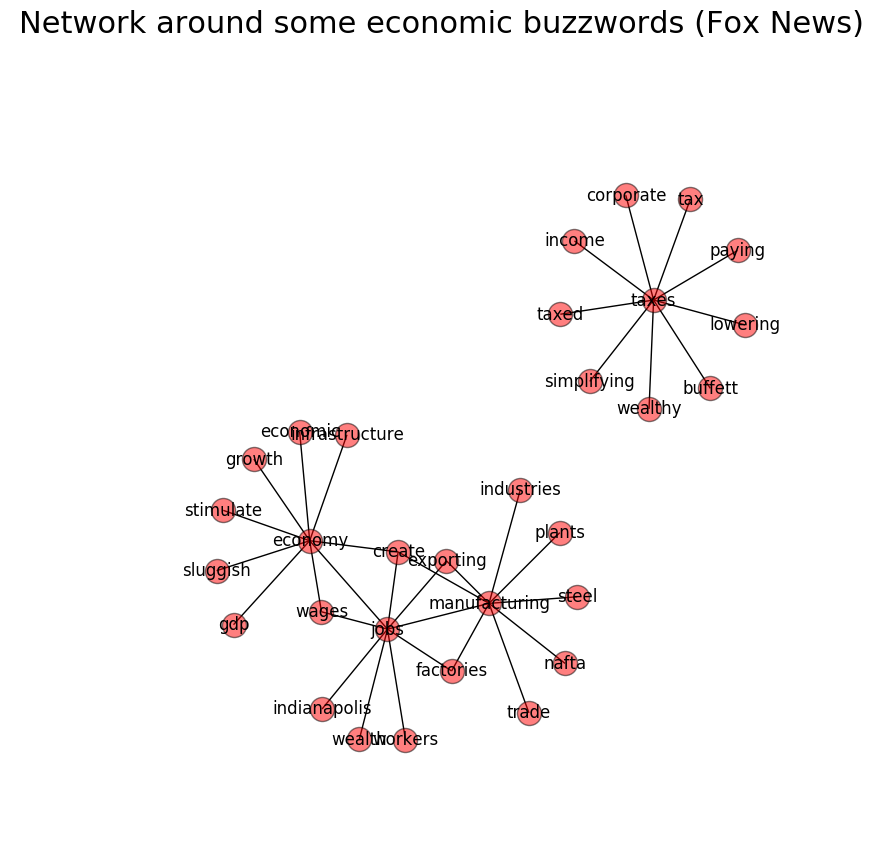

In [11]:
g = e.generate_graph(10, words=['jobs', 'manufacturing', 'taxes', 'economy'])
fig, ax = vis_graph(g, figsize=(10, 10))
ax.set_title('Network around some economic buzzwords (Fox News)', size=22)
#fig.patch.set_visible(False)

ax.axis('off')
plt.show()